<a href="https://colab.research.google.com/github/Robert-Gomez-AI/HeartFailure/blob/main/Fase_2_Entendimiento_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1vU_Lg5LD6Dn521znF_9E6OsJgwptOT9E" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento de los Datos**
---

Este notebook es una plantilla que le puede servir como guía para el segundo entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. ---**INGRESE SU RESPUESTA**---
2. ---**INGRESE SU RESPUESTA**---
3. ---**INGRESE SU RESPUESTA**---

## **1. Carga de datos**
---
Proporcione únicamente el código de Python necesario para descargar el conjunto de datos que será utilizado en el proyecto. Si es necesario, realice operaciones de adquisición e integración del conjunto de datos.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

from google.colab import files
files=files.upload()

!ls

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv
heart_failure_clinical_records_dataset.csv  sample_data


In [4]:
#Lectura de los datos en Github
#df=pd.read_csv('Data/heart_failure_clinical_records_dataset.csv')
#Lectura de los datos desde repositorio local
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

## **2. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

###**2.1 Exploración de los datos**

In [5]:
#Primer acercamiento a los datos
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
158,85.0,1,910,0,50,0,235000.0,1.3,134,1,0,121,0
179,55.0,0,835,0,40,0,279000.0,0.7,140,1,1,147,0
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0
218,68.0,1,1021,1,35,0,271000.0,1.1,134,1,0,197,0
65,60.0,0,68,0,20,0,119000.0,2.9,127,1,1,64,1


In [8]:
#Dimensiones
print(f'El set de datos contiene {df.shape[0]} registros con {df.shape[1]} variables.\nEl conjunto contiene un total de {df.size} datos.\n')
tamaño_archivo=os.path.getsize('heart_failure_clinical_records_dataset.csv')/ (1024 ** 2)
print(f'El archivo cargado pesa un total de {tamaño_archivo} MB.\nEl espacio en memoria del dataframe es de {df.memory_usage().sum()/(1024**2)} MB')

El set de datos contiene 299 registros con 13 variables.
El conjunto contiene un total de 3887 datos.

El archivo cargado pesa un total de 0.011672019958496094 MB.
El espacio en memoria del dataframe es de 0.02977752685546875 MB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


###**2.2 Tipos de variables**

In [10]:
def identificar_dtypes(df):
  '''
  Esta función detecta las variables consideradas como categoricas y cuantitativas en este set especifico
  La función retorna dos listas, cada una agrupando las variables del dataframe
  La función solo identifica las variables categoricas para este tipo de dataset en el cual solo tienen dos valores: [0,1]
  '''
  variables_categoricas=[]
  variables_cuantitativas=[]
  for col in df.columns:
    if set(df[col].unique())==set([0,1]):
      variables_categoricas.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
      variables_cuantitativas.append(col)
    else:
      print(f'La variable {col} no ha sido identificada')
  return variables_categoricas,variables_cuantitativas

In [11]:
variables_categoricas,variables_cuantitativas=identificar_dtypes(df)
print(f'Variables categoricas: {variables_categoricas}.\n\nVariables cuantitativas: {variables_cuantitativas}')

Variables categoricas: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'].

Variables cuantitativas: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


#### **Tabla 1: Características del conjunto de datos sobre pacientes con insuficiencia cardíaca**

| Característica | Descripción | Tipo |
|---|---|---|
| Edad | Edad del paciente en años | Numérica |
| Sexo | Sexo del paciente (hombre/mujer) | Binaria |
| Peso | Peso del paciente en kilogramos | Numérica |
| Altura | Altura del paciente en metros | Numérica |
| Hemoglobina | Nivel de hemoglobina en la sangre (g/dL) | Numérica |
| Presión arterial | Presión arterial sistólica/diastólica (mmHg) | Numérica |
| Diabetes | ¿Tiene diabetes el paciente? (sí/no) | Binaria |
| Tabaquismo | ¿Fuma el paciente? (sí/no) | Binaria |
| Anemia | ¿Tiene anemia el paciente? (sí/no) | Binaria |
| CPK | Nivel de la enzima CPK en la sangre (U/L) | Numérica |
| EF | Eficiencia cardíaca (%) | Numérica |
| Creatinina sérica | Nivel de creatinina en la sangre (mg/dL) | Numérica |
| Sodio sérico | Nivel de sodio en la sangre (mEq/L) | Numérica |
| Evento de muerte | ¿El paciente murió durante el seguimiento? (sí/no) | Binaria |


### **2.3 Resumen General**
---

- ¿Cuántos registros contiene el *dataset*?
- ¿En qué formato están guardados los datos?
- ¿Qué tamaño en MB tiene el conjunto de datos?

**Responder aqui**

## **3. Análisis estadístico descriptivo**
---

Describa el conjunto de datos por medio de estadística descriptiva, aportando interpretaciones precisas que ayuden a entender los datos.

###**3.1 Medidas de posición (tendencia central y cuantiles)**

In [12]:
#Medidas de tendencia central: Mediana
df[variables_cuantitativas].median()

age                             60.0
creatinine_phosphokinase       250.0
ejection_fraction               38.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
time                           115.0
dtype: float64

In [13]:
#Medidas de tendencia central: Moda
df.mode()
#Encontramos que para la variable time tenemos 2 modas: 187 y 250

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,60.0,0.0,582.0,0.0,35.0,0.0,263358.03,1.0,136.0,1.0,0.0,187,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,NaN


In [14]:
#Medidas de tendencia central: Media, desviación estandar
#Medidas de posición: Cuantiles
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


####**3.1.1 Graficos de caja o boxplots**

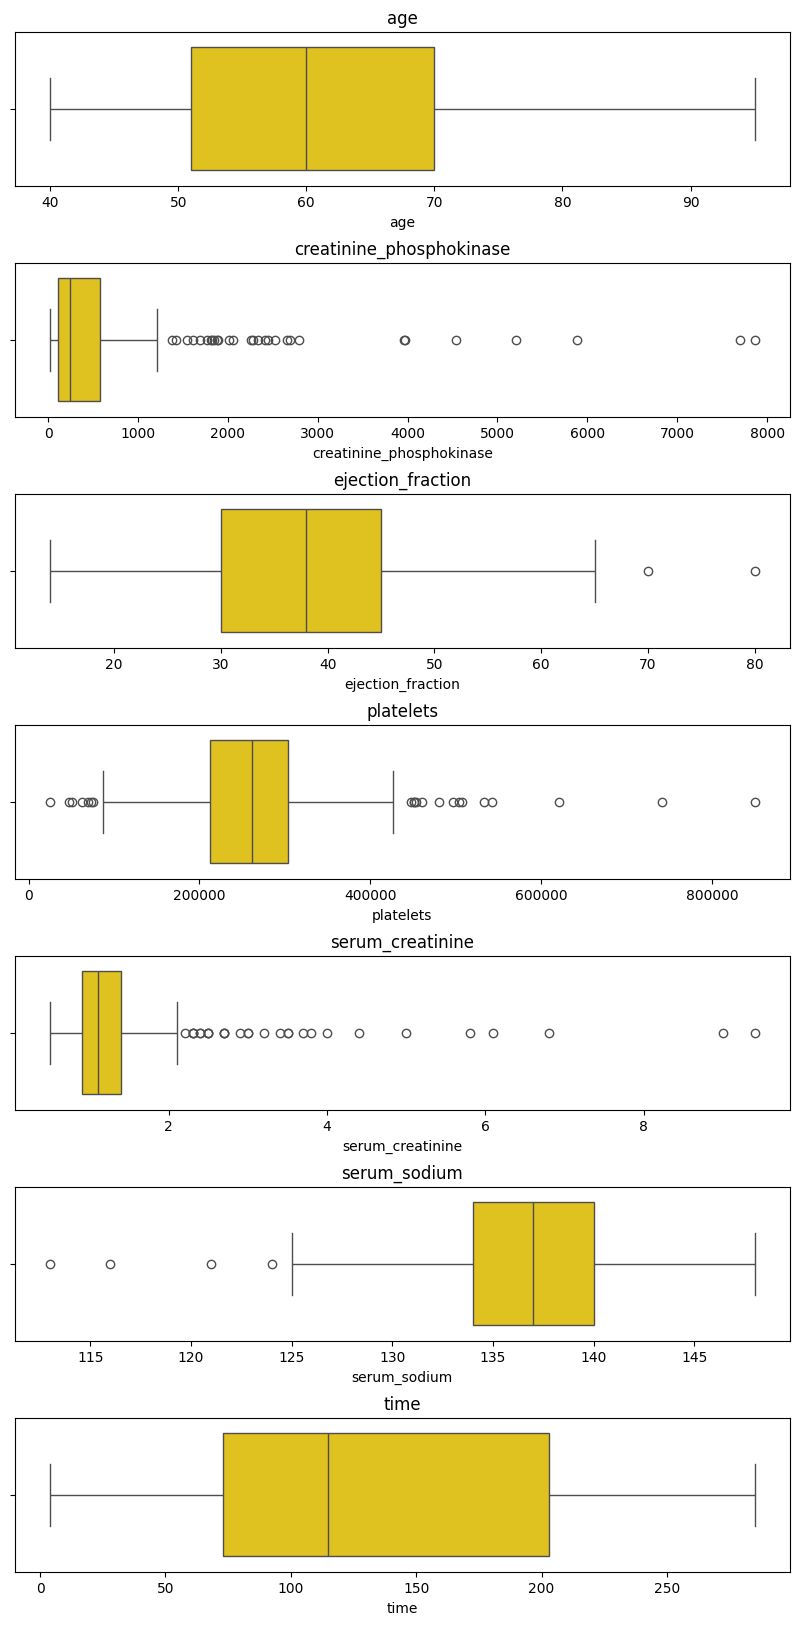

In [15]:
#Boxplots para identificar outliers
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(variables_cuantitativas):
    sns.boxplot(x=col, data=df, ax=ax[i],color='gold')
    ax[i].set_title(col)

###**3.2 Medidas de forma**

In [16]:
#Medidas de forma: Kurtosis
df[variables_cuantitativas].kurt()

age                         -0.184871
creatinine_phosphokinase    25.149046
ejection_fraction            0.041409
platelets                    6.209255
serum_creatinine            25.828239
serum_sodium                 4.119712
time                        -1.212048
dtype: float64

In [17]:
#Medidas de forma: Asimetria
df[variables_cuantitativas].skew()

age                         0.423062
creatinine_phosphokinase    4.463110
ejection_fraction           0.555383
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
time                        0.127803
dtype: float64

####**3.1.1 Histogramas**
---
Visualizar la distribución de los datos

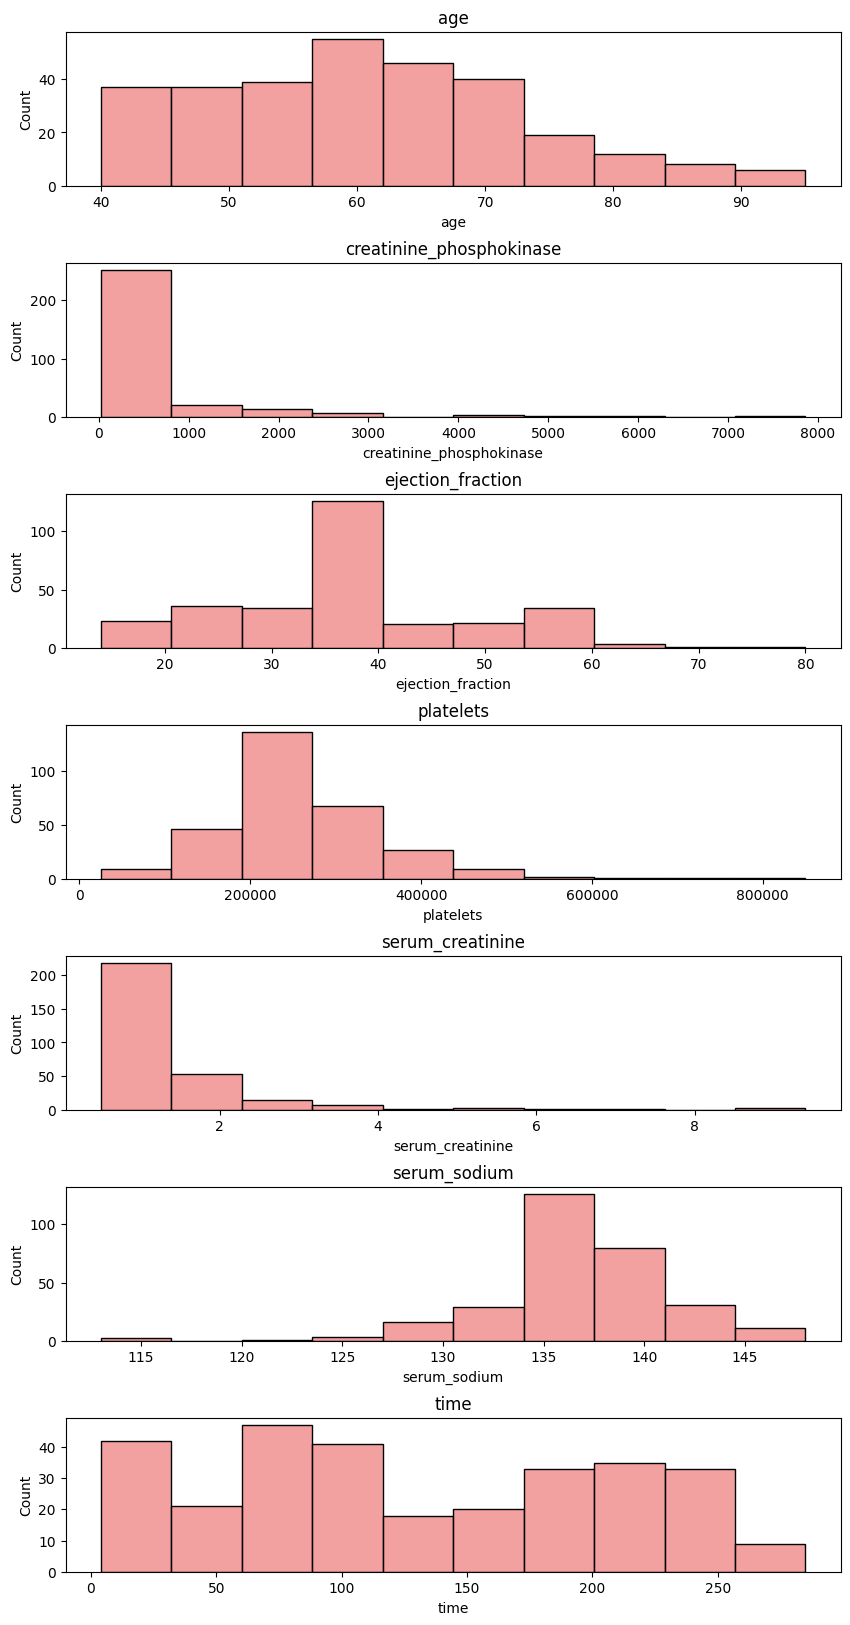

In [18]:
#Histogramas
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

for i, columna in enumerate(variables_cuantitativas):
    sns.histplot(df[columna], bins=10, kde=False, ax=ax[i],color='lightcoral')
    ax[i].set_title(columna)

###**3.1.2 Diagramas de barras**
---
Para visualizar las variables binarias o categoricas

<ipython-input-19-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
<ipython-input-19-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
<ipython-input-19-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
<ipython-input-19-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

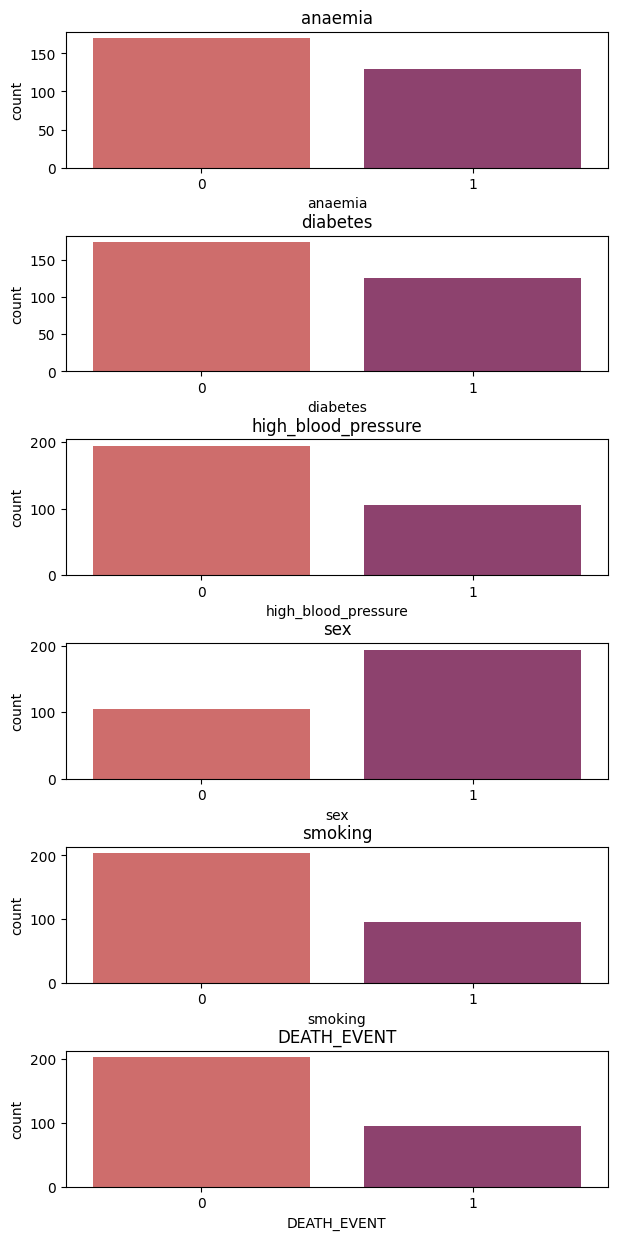

In [19]:
fig,ax=plt.subplots(nrows=len(variables_categoricas),ncols=1,figsize=(7,15))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(variables_categoricas):
  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
  ax[i].set_title(col)

###**3.3 Medidas de dispersión**

In [20]:
#Media, valor minimo, valor maximo y desiación estandar
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [21]:
#Varianza
df[variables_cuantitativas].var()

age                         1.414865e+02
creatinine_phosphokinase    9.414586e+05
ejection_fraction           1.400635e+02
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
time                        6.023965e+03
dtype: float64

In [22]:
#Rango
df[variables_cuantitativas].max()-df[variables_cuantitativas].min()

age                             55.0
creatinine_phosphokinase      7838.0
ejection_fraction               66.0
platelets                   824900.0
serum_creatinine                 8.9
serum_sodium                    35.0
time                           281.0
dtype: float64

In [23]:
#Media de las variables agrupadas por sexo
df.groupby('sex').mean()[variables_cuantitativas]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
sex,,,,,,,
0,59.777781,476.780952,40.466667,279964.021619,1.384095,136.790476,131.904762
1,61.405500,638.701031,36.793814,254370.249897,1.399175,136.536082,129.371134


###**3.4 Medidas multivariadas**

In [30]:
#correlación
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [31]:
#covarianza
df[variables_cuantitativas].cov()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,141.486483,-9.415915e+02,8.460237,-6.090712e+04,1.958845,-2.412544,-206.861351
creatinine_phosphokinase,-941.591531,9.414586e+05,-506.174452,2.321533e+06,-16.470382,254.956443,-703.803618
ejection_fraction,8.460237,-5.061745e+02,140.063455,8.354524e+04,-0.138379,9.185787,38.330464
platelets,-60907.118586,2.321533e+06,83545.241001,9.565669e+09,-4168.399498,26810.436905,79811.066099
serum_creatinine,1.958845,-1.647038e+01,-0.138379,-4.168399e+03,1.070211,-0.863173,-11.988935
serum_sodium,-2.412544,2.549564e+02,9.185787,2.681044e+04,-0.863173,19.469956,30.014152
time,-206.861351,-7.038036e+02,38.330464,7.981107e+04,-11.988935,30.014152,6023.965276


<Axes: >

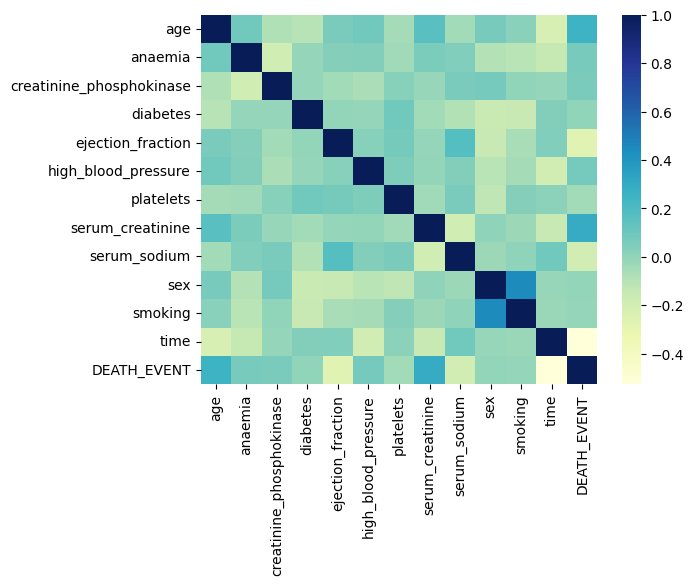

In [32]:
sns.heatmap(df.corr(),
            cmap='YlGnBu')

####**3.4.1 Crosstabs para variables categoricas frente a DEATH_EVENT**

In [77]:
#Frente al sexo
pd.crosstab(df['DEATH_EVENT'],df['sex'],
            margins=True)

sex,0,1,All
DEATH_EVENT,,,
0,71,132,203
1,34,62,96
All,105,194,299


In [76]:
#Frente a la anemia
pd.crosstab(df['DEATH_EVENT'],df['anaemia'],
            margins=True)

anaemia,0,1,All
DEATH_EVENT,,,
0,120,83,203
1,50,46,96
All,170,129,299


In [78]:
#Frente a la diabetes
pd.crosstab(df['DEATH_EVENT'],df['diabetes'],
            margins=True)

diabetes,0,1,All
DEATH_EVENT,,,
0,118,85,203
1,56,40,96
All,174,125,299


In [79]:
#Frente a fumar
pd.crosstab(df['DEATH_EVENT'],df['smoking'],
            margins=True)

smoking,0,1,All
DEATH_EVENT,,,
0,137,66,203
1,66,30,96
All,203,96,299


In [80]:
#Frente a la alta presión sanguinea
pd.crosstab(df['DEATH_EVENT'],df['high_blood_pressure'],
            margins=True)

high_blood_pressure,0,1,All
DEATH_EVENT,,,
0,137,66,203
1,57,39,96
All,194,105,299


### **4. Resumen de la Calidad de los datos**
---

- ¿Se detecta la ausencia de datos, la presencia de datos erróneos o la existencia de datos de baja calidad en el conjunto?
- ¿Se identifican registros con datos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?
- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?
- ¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?

In [81]:
# ---INGRESE SU CÓDIGO---

---**INGRESE SU RESPUESTA**---

### **2.4. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.

In [ ]:
# ---INGRESE SU CÓDIGO---

---**INGRESE SU RESPUESTA**---

## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*